In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("..")

cwd = os.getcwd()

In [3]:
input_folder = os.path.join(cwd, "input")

output_folder = os.path.join(cwd, "output")

In [4]:
# Set plot color
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plot_tone = cmap(0.0)

# 1. Import the predictors and prediction target

In [5]:
covariates = pd.read_csv(f'{input_folder}\\covariates.csv')

covariates

,Unnamed: 0,site_id,bdod_mean,bdod_std,clay_mean,clay_std,cti_mean,cti_std,dem_mean,dem_std,...,sand_mean,sand_std,slope_mean,slope_std,stream_density,totprecip_mean,totprecip_std,tri_mean,tri_std,pop_dens
0,0,ee_SJA0088000,0.65,0.06,16.15,4.94,-0.30,2.05,39.36,18.11,...,55.41,8.17,3.83,3.56,1.01,789.0,13.0,6.48,5.09,5.80
1,1,ee_SJA0106000,0.64,0.05,14.51,1.15,-0.13,1.88,61.33,6.78,...,44.00,2.70,3.14,3.60,1.12,713.0,3.0,5.30,5.31,14.15
2,2,ee_SJA0112000,0.65,0.05,13.10,1.51,-0.52,1.90,92.82,15.55,...,56.22,3.94,3.90,3.86,0.87,759.0,3.0,6.44,5.73,7.47
3,3,ee_SJA0135000,0.63,0.05,14.98,1.75,-0.21,2.07,90.99,15.26,...,48.73,3.87,3.12,3.33,0.98,760.0,8.0,5.24,4.87,7.76
4,4,ee_SJA0148000,0.64,0.06,16.08,4.46,-0.25,2.08,56.89,23.92,...,48.63,7.69,3.82,3.93,1.00,766.0,20.0,6.41,5.70,15.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,947,lt_666,0.99,0.09,16.73,0.85,-0.15,1.93,20.11,9.92,...,53.65,1.11,3.14,3.86,0.91,782.0,16.0,5.18,5.66,38.81
890,948,lt_667,0.90,0.04,12.67,1.37,-0.45,1.89,121.38,13.19,...,54.37,2.62,4.03,4.15,0.88,761.0,2.0,6.54,5.97,14.41
891,949,lt_668,0.93,0.05,15.52,1.08,-0.12,1.88,66.35,11.28,...,44.17,2.62,2.53,3.64,0.99,710.0,2.0,4.17,5.40,31.76
892,950,lt_669,0.85,0.04,9.48,1.00,-0.32,1.98,151.39,13.76,...,65.66,2.17,4.55,4.47,1.00,768.0,1.0,7.59,6.27,9.55


In [6]:
covariates.rename(columns={'bdod_0-5cm_mean_mean': 'bdod_mean', 'phh2o_0-5cm_mean_mean': 'phh2o_mean',
                     'sand_0-5cm_mean_mean':'sand_mean',  'clay_0-5cm_mean_mean': 'clay_mean',
                     'bdod_0-5cm_mean_std': 'bdod_std', 'phh2o_0-5cm_mean_std': 'phh2o_std',
                     'sand_0-5cm_mean_std':'sand_std',  'clay_0-5cm_mean_std': 'clay_std',}, inplace=True)

In [7]:
covariates = covariates.dropna()

In [8]:
covariates.columns

Index(['Unnamed: 0', 'site_id', 'bdod_mean', 'bdod_std', 'clay_mean',
       'clay_std', 'cti_mean', 'cti_std', 'dem_mean', 'dem_std',
       'dist_from_streams_mean', 'dist_from_streams_std',
       'dist_to_outlet_mean', 'dist_to_outlet_std', 'flow_acc_mean',
       'flow_acc_std', 'forest_loss', 'livestock_mean', 'livestock_std',
       'longest_upstream_dist_mean', 'longest_upstream_dist_std', 'tree_cov',
       'grassland', 'cropland', 'built_up', 'water', 'wetland', 'other',
       'area', 'maxtemp_mean', 'maxtemp_std', 'meantemp_mean', 'meantemp_std',
       'mintemp_mean', 'mintemp_std', 'phh2o_mean', 'phh2o_std', 'sand_mean',
       'sand_std', 'slope_mean', 'slope_std', 'stream_density',
       'totprecip_mean', 'totprecip_std', 'tri_mean', 'tri_std', 'pop_dens'],
      dtype='object')

In [9]:
tn = pd.read_csv(f'{input_folder}\\tn.csv')

tp = pd.read_csv(f'{input_folder}\\tp.csv')

In [10]:
def plot_correlations(target_df, predictor_df, param, cat):
    
    df = pd.merge(target_df, predictor_df, on = 'site_id', how = 'left')
    
    print(len(df))
    
    corr = df.drop(columns=['site_id', 'X', 'Y']).corr(method='spearman')

    mask = np.triu(np.ones(corr.shape)).astype(bool)

    # Plot the heatmap
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(corr, annot=True, mask=mask,annot_kws={"size": 10}, cmap=cmap, center=0, vmin=-1, vmax=1)
    plt.title(f'{param} {cat} correlation matrix', fontsize=16)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10, rotation=45, ha='right')
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12) 
    plt.show()

893


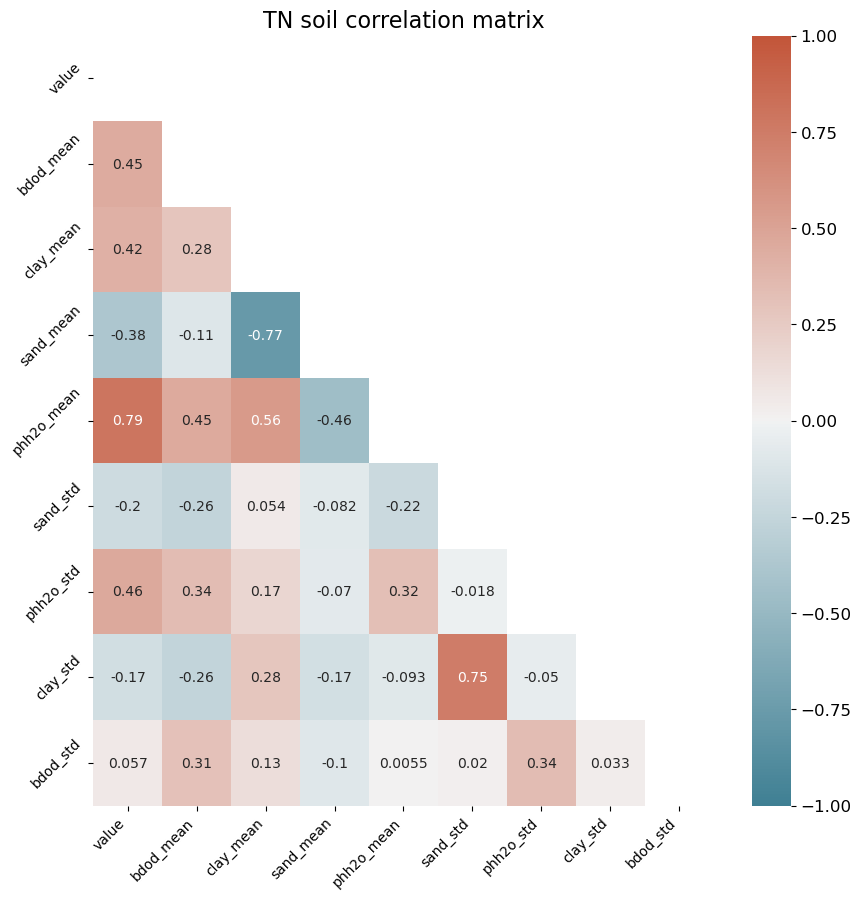

In [11]:
plot_correlations(tn, covariates[['site_id', 'bdod_mean', 'clay_mean',  'sand_mean','phh2o_mean',
      'sand_std', 'phh2o_std', 'clay_std', 'bdod_std']], 'TN', 'soil')


soil_preds_tn = covariates[['site_id', 'bdod_mean', 'clay_mean', 'clay_std','phh2o_mean', 'phh2o_std']]


893


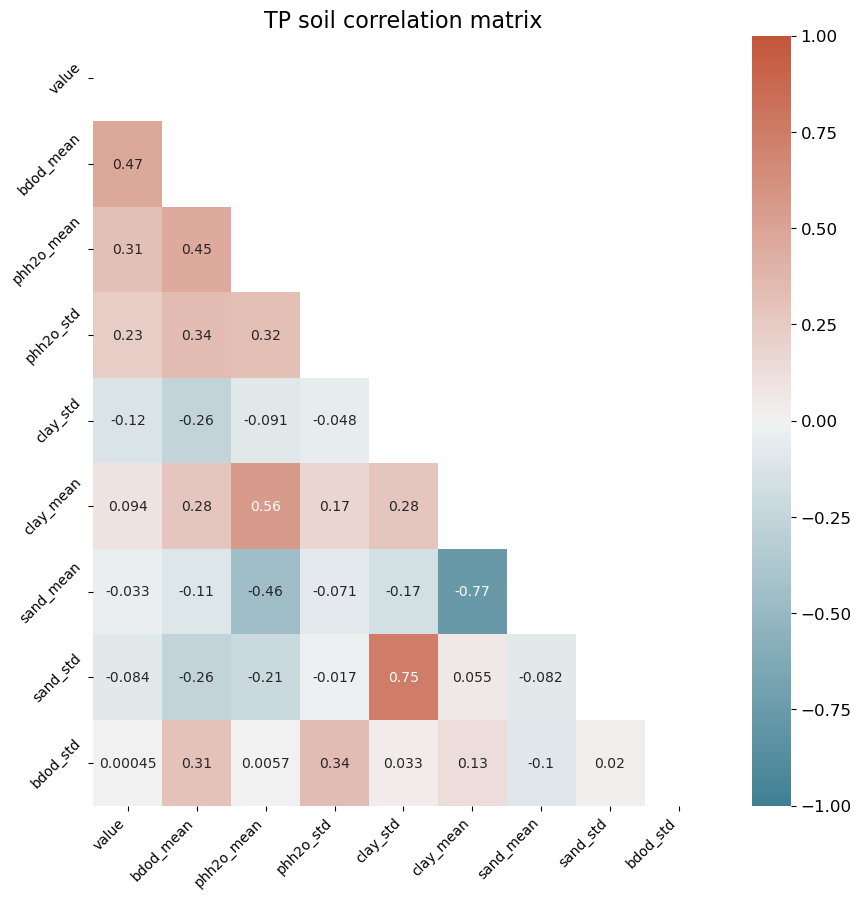

In [12]:
plot_correlations(tp, covariates[['site_id', 'bdod_mean',  'phh2o_mean',
      'phh2o_std', 'clay_std', 'clay_mean', 'sand_mean','sand_std', 'bdod_std']], 'TP', 'soil')



soil_preds_tp = covariates[['site_id', 'bdod_mean', 'clay_std','phh2o_mean', 'phh2o_std']]

893


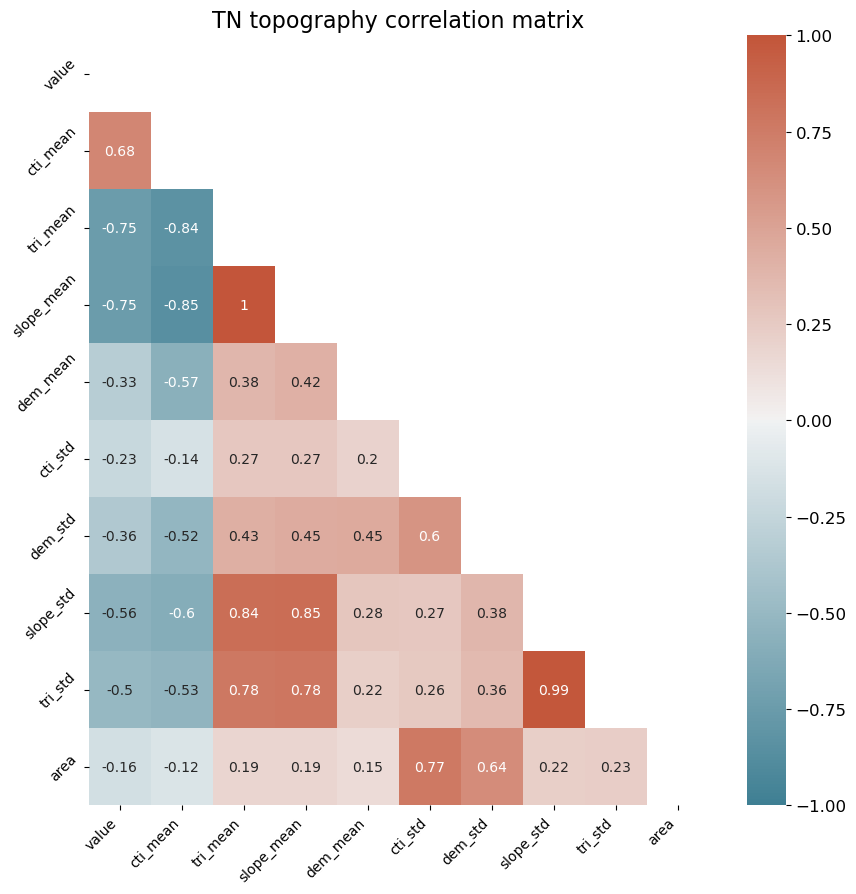

In [13]:
plot_correlations(tn, covariates[['site_id', 'cti_mean', 'tri_mean', 'slope_mean', 'dem_mean','cti_std', 'dem_std','slope_std','tri_std', 'area']],
                 'TN', 'topography')


topography_preds_tn = covariates[['site_id', 'dem_mean', 'dem_std', 'slope_mean']]

893


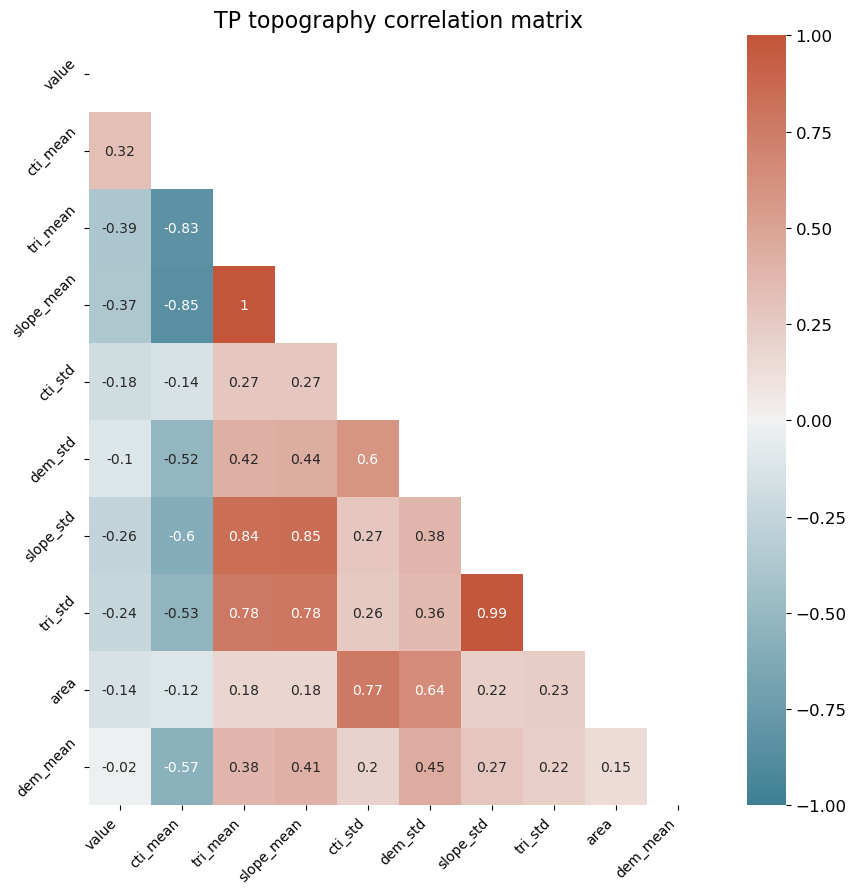

In [14]:
plot_correlations(tp, covariates[['site_id', 'cti_mean', 'tri_mean', 'slope_mean', 'cti_std', 'dem_std','slope_std','tri_std', 'area', 'dem_mean']],
                 'TP', 'topography',)


topography_preds_tp = covariates[['site_id', 'cti_std', 'slope_mean']]

893


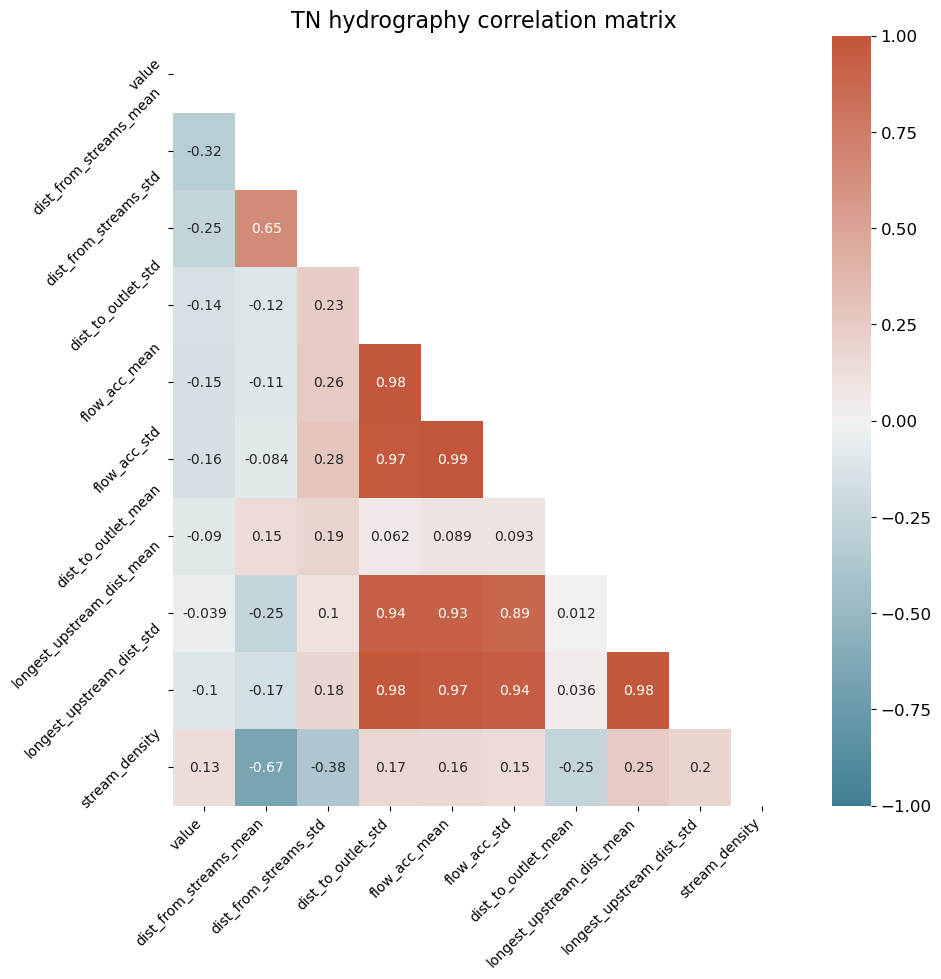

In [15]:
plot_correlations(tn, covariates[['site_id', 'dist_from_streams_mean', 'dist_from_streams_std', 'dist_to_outlet_std',
       'flow_acc_mean', 'flow_acc_std',  'dist_to_outlet_mean', 'longest_upstream_dist_mean',
       'longest_upstream_dist_std',  'stream_density']], 'TN', 'hydrography', )


hydrography_preds_tn = covariates[['site_id', 'flow_acc_mean', 'dist_from_streams_mean']]

893


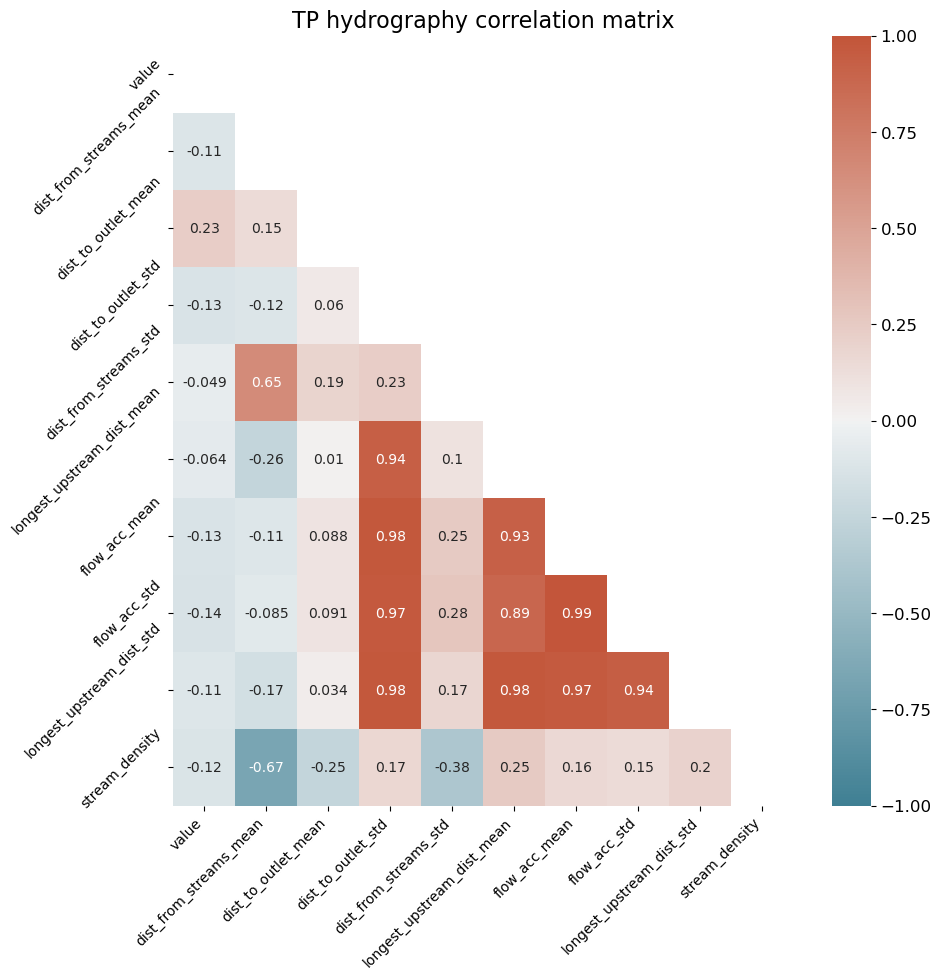

In [16]:
plot_correlations(tp, covariates[['site_id', 'dist_from_streams_mean',  'dist_to_outlet_mean', 'dist_to_outlet_std', 'dist_from_streams_std',  'longest_upstream_dist_mean',
       'flow_acc_mean', 'flow_acc_std', 
       'longest_upstream_dist_std',  'stream_density']], 'TP', 'hydrography')


hydrography_preds_tp = covariates[['site_id', 'flow_acc_mean','dist_to_outlet_mean', 'stream_density']]

893


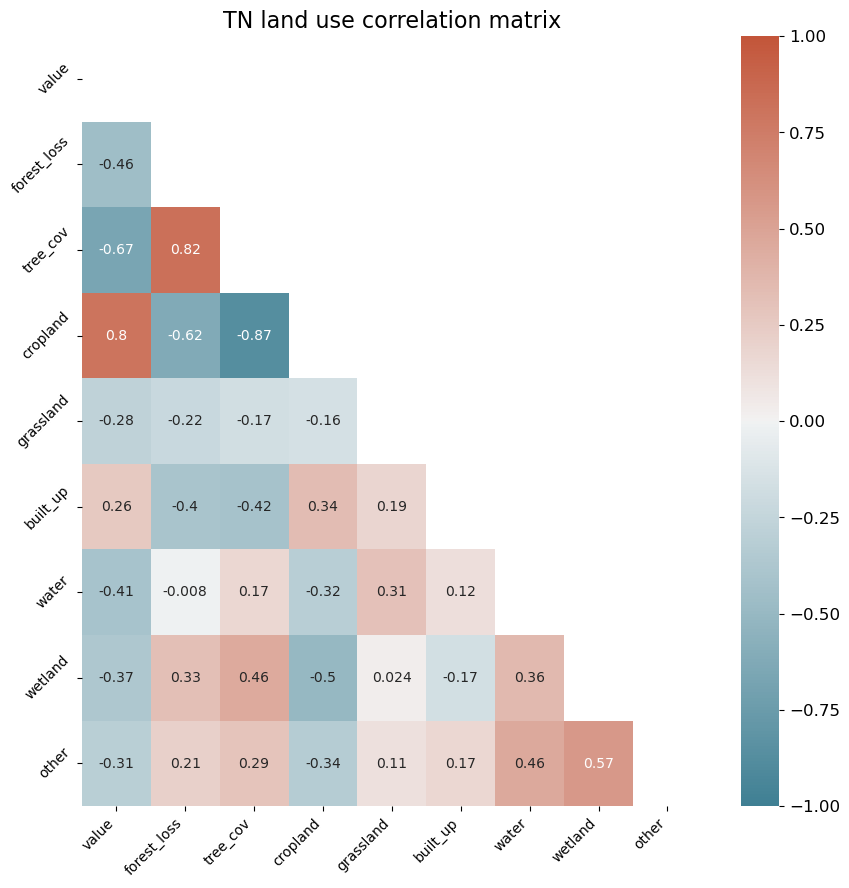

In [17]:
plot_correlations(tn, covariates[['site_id',  'forest_loss', 'tree_cov','cropland', 'grassland', 'built_up', 'water', 'wetland', 'other']],
                 'TN', 'land use')

lulc_preds_tn = covariates[['site_id', 'grassland', 'cropland', 'built_up', 'water', 'wetland', 'other']]

893


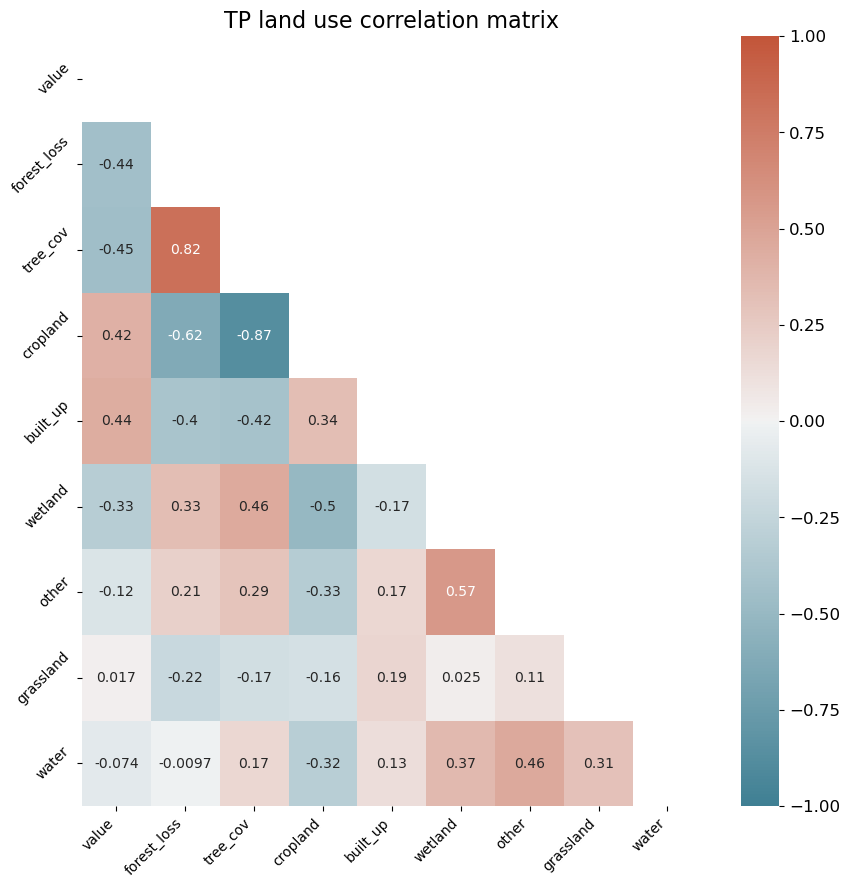

In [18]:
plot_correlations(tp, covariates[['site_id', 'forest_loss', 'tree_cov', 'cropland',  'built_up',  'wetland', 'other', 'grassland','water']], 
                 'TP', 'land use')

lulc_preds_tp = covariates[['site_id', 'cropland', 'built_up', 'wetland', 'other']]

893


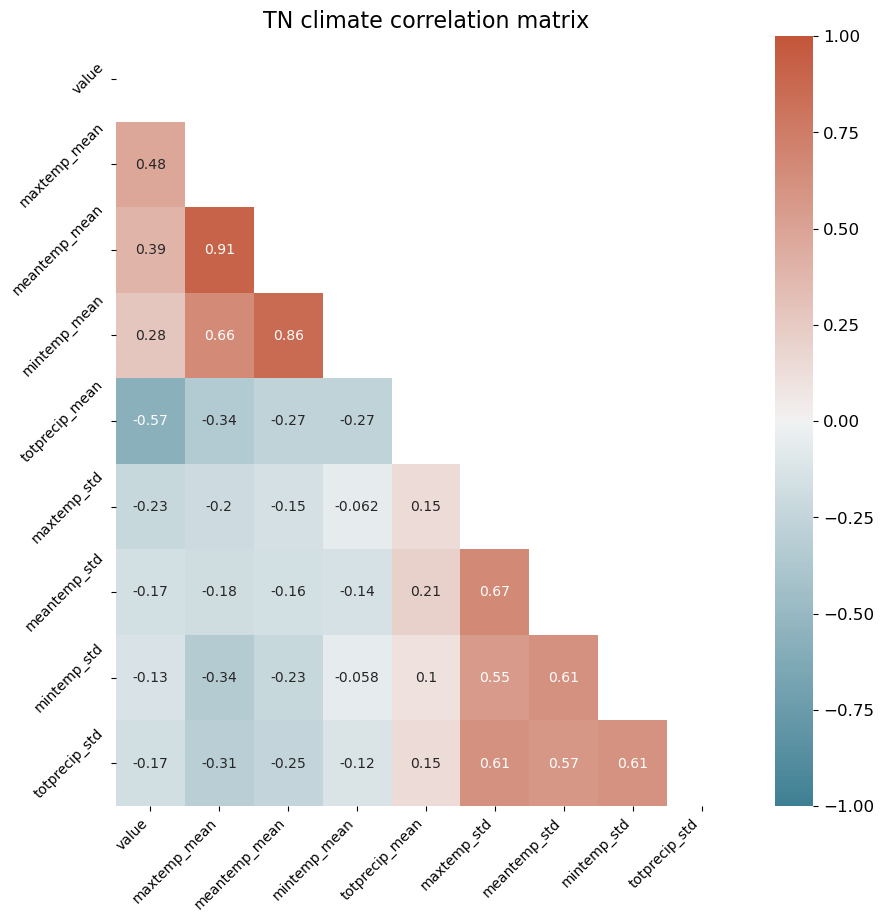

In [19]:
plot_correlations(tn, covariates[['site_id', 'maxtemp_mean','meantemp_mean', 'mintemp_mean','totprecip_mean', 'maxtemp_std',  'meantemp_std','mintemp_std', 'totprecip_std']],
                 'TN', 'climate')


climate_preds_tn = covariates[['site_id', 'meantemp_mean', 'totprecip_mean', 'meantemp_std', 'totprecip_std']]

893


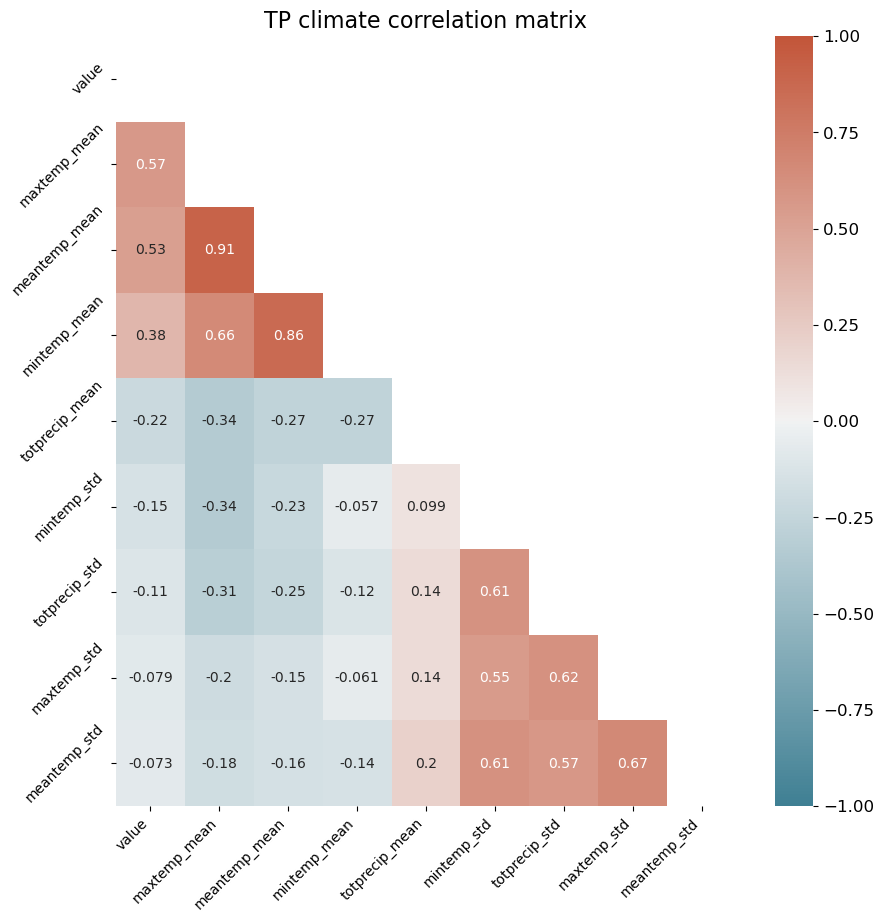

In [20]:
plot_correlations(tp, covariates[['site_id', 'maxtemp_mean','meantemp_mean', 'mintemp_mean','totprecip_mean',  'mintemp_std', 'totprecip_std','maxtemp_std',  'meantemp_std']],
                 'TP', 'climate')

climate_preds_tp = covariates[['site_id', 'meantemp_mean', 'totprecip_mean', 'totprecip_std']]

893


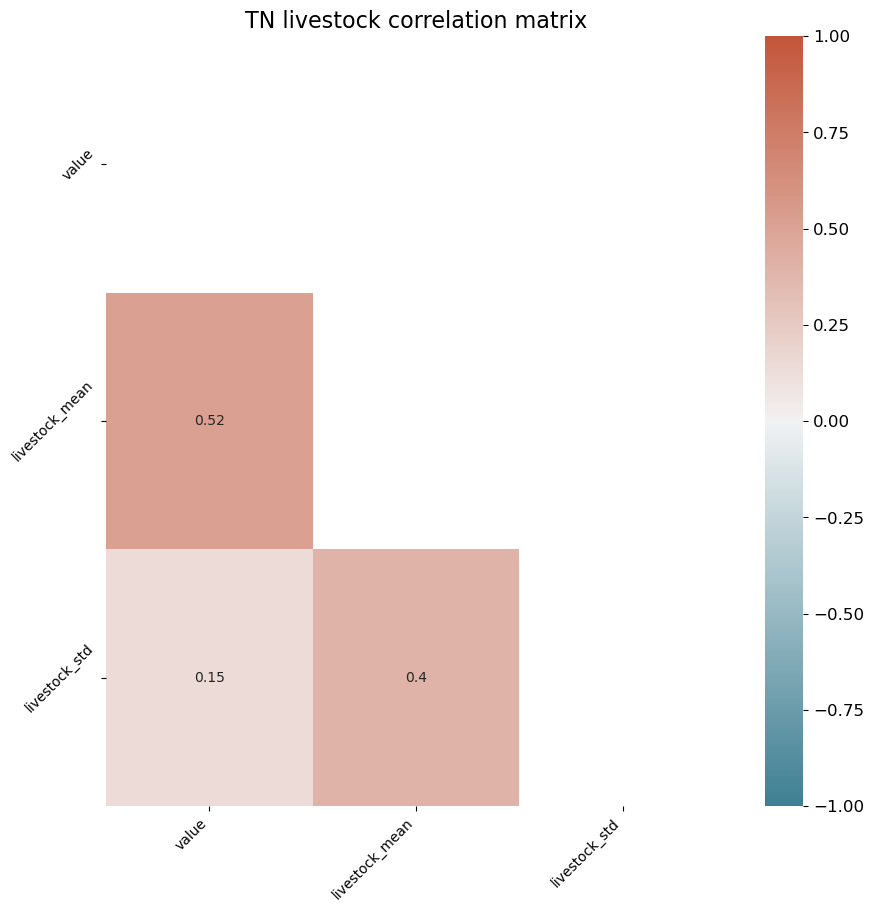

In [21]:
plot_correlations(tn, covariates[['site_id', 'livestock_mean', 'livestock_std']], 'TN', 'livestock')

livestock_preds_tn = covariates[['site_id', 'livestock_mean', 'livestock_std']]

893


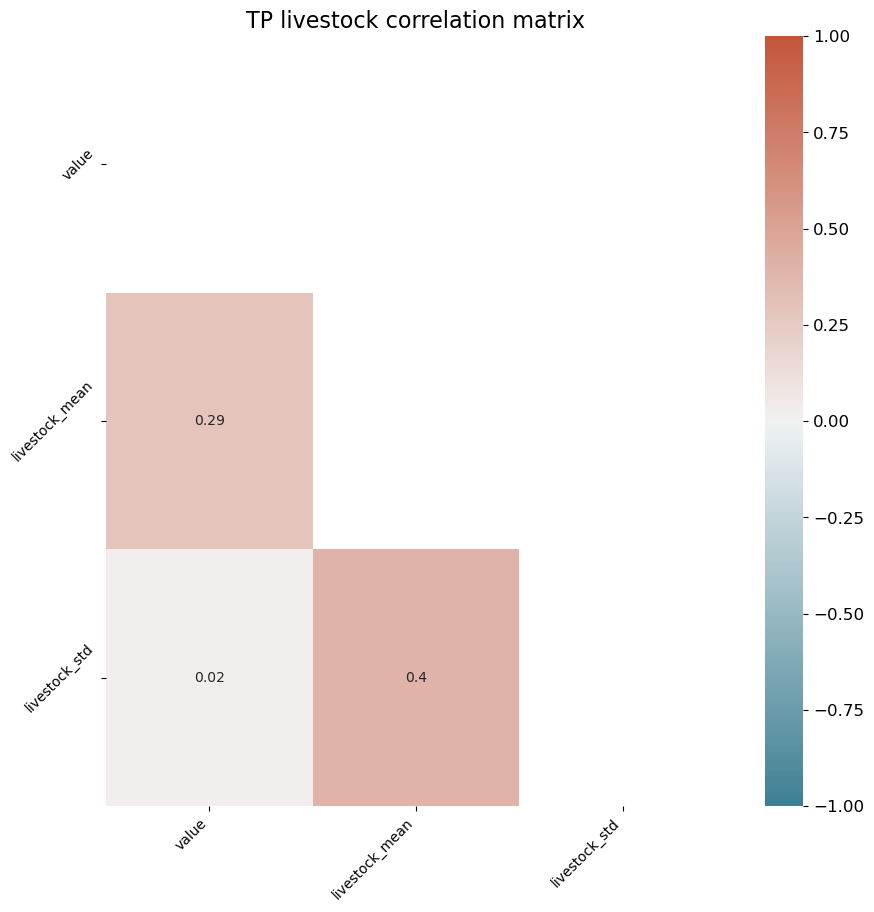

In [22]:
plot_correlations(tp, covariates[['site_id', 'livestock_mean', 'livestock_std']],  'TP', 'livestock')

livestock_preds_tp = covariates[['site_id', 'livestock_mean']]

893


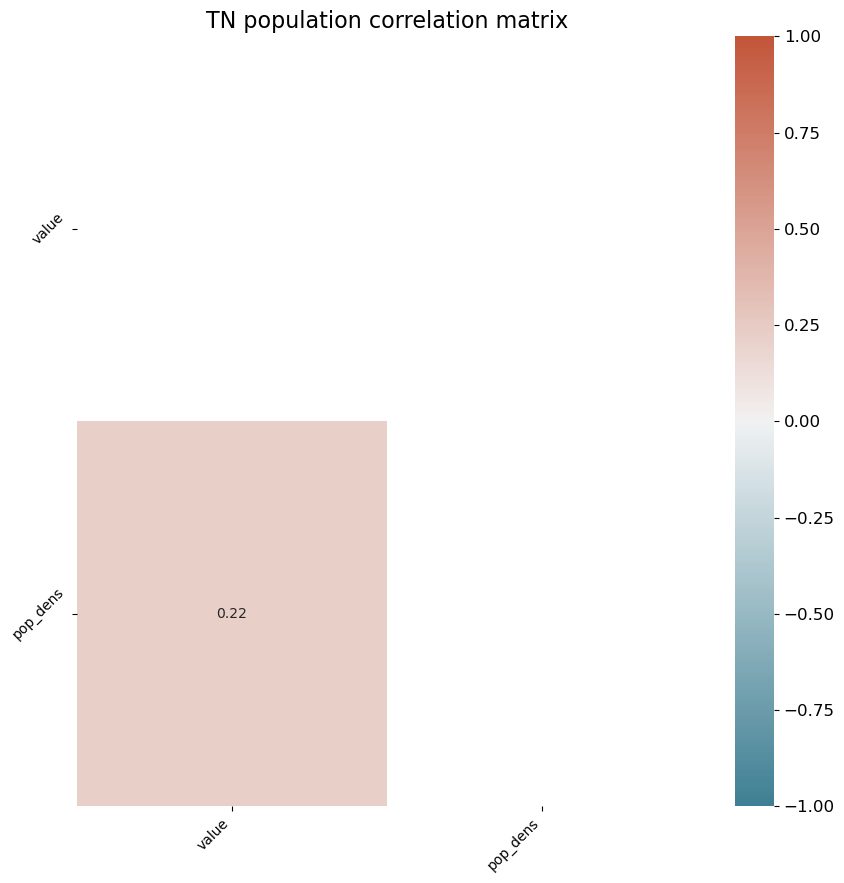

In [23]:
plot_correlations(tn, covariates[['site_id', 'pop_dens']], 'TN', 'population')

population_preds_tn = covariates[['site_id', 'pop_dens']]


893


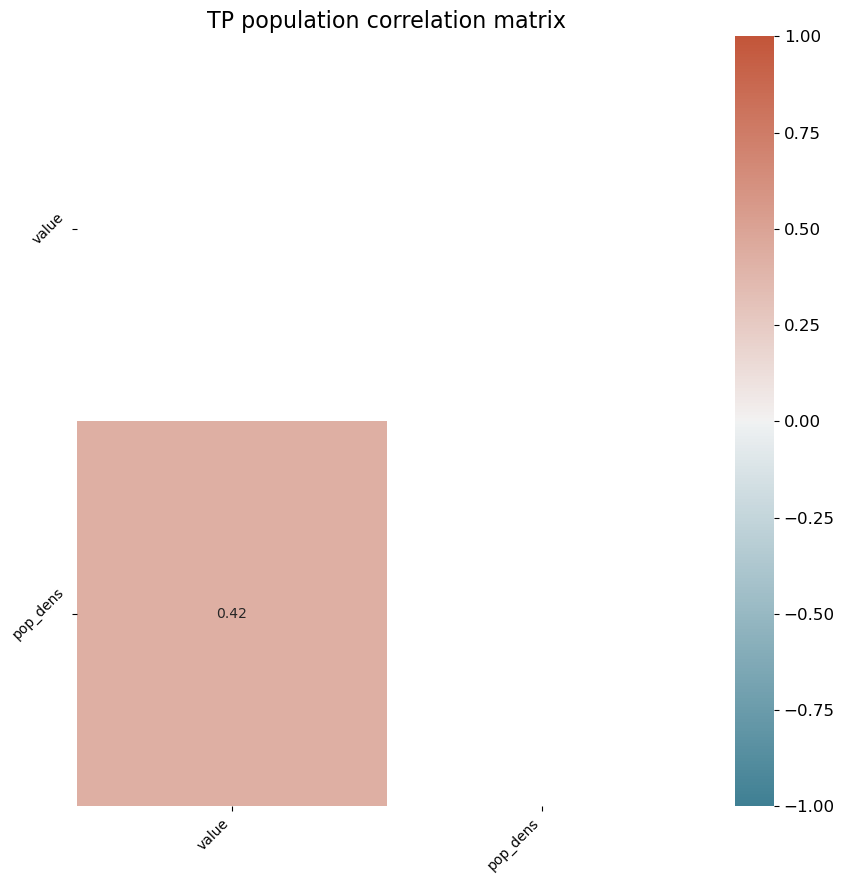

In [24]:
plot_correlations(tp, covariates[['site_id', 'pop_dens']],  'TP', 'population')

population_preds_tp = covariates[['site_id', 'pop_dens']]


In [25]:
from functools import reduce

dfs_tn = [soil_preds_tn, topography_preds_tn, hydrography_preds_tn, lulc_preds_tn, climate_preds_tn, livestock_preds_tn, population_preds_tn]

covariates_tn = reduce(lambda left, right: pd.merge(left, right, on='site_id'), dfs_tn)

covariates_tn

,site_id,bdod_mean,clay_mean,clay_std,phh2o_mean,phh2o_std,dem_mean,dem_std,slope_mean,flow_acc_mean,...,water,wetland,other,meantemp_mean,totprecip_mean,meantemp_std,totprecip_std,livestock_mean,livestock_std,pop_dens
0,ee_SJA0088000,0.65,16.15,4.94,5.68,0.31,39.36,18.11,3.83,1.92,...,0.42,6.58,0.5,7.2,789.0,0.1,13.0,3.13,1.60,5.80
1,ee_SJA0106000,0.64,14.51,1.15,6.19,0.21,61.33,6.78,3.14,0.34,...,0.16,0.16,0.1,6.8,713.0,0.1,3.0,17.81,1.49,14.15
2,ee_SJA0112000,0.65,13.10,1.51,5.88,0.26,92.82,15.55,3.90,0.55,...,0.31,0.18,0.4,6.8,759.0,0.0,3.0,7.02,1.45,7.47
3,ee_SJA0135000,0.63,14.98,1.75,5.91,0.53,90.99,15.26,3.12,2.19,...,0.10,5.11,0.7,6.5,760.0,0.1,8.0,15.08,7.87,7.76
4,ee_SJA0148000,0.64,16.08,4.46,5.88,0.36,56.89,23.92,3.82,6.09,...,0.30,4.89,0.8,6.9,766.0,0.2,20.0,8.21,6.82,15.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,lt_666,0.99,16.73,0.85,5.95,0.42,20.11,9.92,3.14,0.47,...,0.67,0.11,0.6,9.0,782.0,0.1,16.0,9.60,0.54,38.81
890,lt_667,0.90,12.67,1.37,5.70,0.45,121.38,13.19,4.03,0.58,...,0.07,0.16,0.3,8.3,761.0,0.0,2.0,9.90,2.24,14.41
891,lt_668,0.93,15.52,1.08,6.59,0.52,66.35,11.28,2.53,0.43,...,0.09,0.01,0.2,8.8,710.0,0.1,2.0,17.13,1.52,31.76
892,lt_669,0.85,9.48,1.00,5.39,0.24,151.39,13.76,4.55,0.67,...,3.66,1.01,0.2,8.2,768.0,0.0,1.0,5.52,1.58,9.55


In [26]:
from functools import reduce

dfs_tp = [soil_preds_tp, topography_preds_tp, hydrography_preds_tp, lulc_preds_tp, climate_preds_tp, livestock_preds_tp, population_preds_tp]

covariates_tp = reduce(lambda left, right: pd.merge(left, right, on='site_id'), dfs_tp)

covariates_tp

,site_id,bdod_mean,clay_std,phh2o_mean,phh2o_std,cti_std,slope_mean,flow_acc_mean,dist_to_outlet_mean,stream_density,cropland,built_up,wetland,other,meantemp_mean,totprecip_mean,totprecip_std,livestock_mean,pop_dens
0,ee_SJA0088000,0.65,4.94,5.68,0.31,2.05,3.83,1.92,53493.42,1.01,6.81,0.11,6.58,0.5,7.2,789.0,13.0,3.13,5.80
1,ee_SJA0106000,0.64,1.15,6.19,0.21,1.88,3.14,0.34,326374.61,1.12,35.75,0.19,0.16,0.1,6.8,713.0,3.0,17.81,14.15
2,ee_SJA0112000,0.65,1.51,5.88,0.26,1.90,3.90,0.55,135077.07,0.87,28.81,0.13,0.18,0.4,6.8,759.0,3.0,7.02,7.47
3,ee_SJA0135000,0.63,1.75,5.91,0.53,2.07,3.12,2.19,83673.12,0.98,26.62,0.18,5.11,0.7,6.5,760.0,8.0,15.08,7.76
4,ee_SJA0148000,0.64,4.46,5.88,0.36,2.08,3.82,6.09,96747.86,1.00,17.40,0.34,4.89,0.8,6.9,766.0,20.0,8.21,15.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,lt_666,0.99,0.85,5.95,0.42,1.93,3.14,0.47,22270.12,0.91,36.37,0.56,0.11,0.6,9.0,782.0,16.0,9.60,38.81
890,lt_667,0.90,1.37,5.70,0.45,1.89,4.03,0.58,391902.46,0.88,31.53,0.40,0.16,0.3,8.3,761.0,2.0,9.90,14.41
891,lt_668,0.93,1.08,6.59,0.52,1.88,2.53,0.43,325102.61,0.99,61.12,0.53,0.01,0.2,8.8,710.0,2.0,17.13,31.76
892,lt_669,0.85,1.00,5.39,0.24,1.98,4.55,0.67,623620.75,1.00,3.17,0.43,1.01,0.2,8.2,768.0,1.0,5.52,9.55


In [27]:
# remove soil pH and population, as they strongly correlate and were created from other environmental variables

covariates_tn = covariates_tn.drop(['pop_dens', 'phh2o_mean', 'phh2o_std'], axis =1)

covariates_tp = covariates_tp.drop(['phh2o_mean', 'phh2o_std', 'pop_dens'], axis =1)

In [28]:
# remove the 1 mismatching site from the final predictor list

covariates_tn = covariates_tn[covariates_tn['site_id'].isin(tn['site_id'])]

covariates_tp =covariates_tp[covariates_tp['site_id'].isin(tp['site_id'])]

In [29]:
covariates_tn.columns

Index(['site_id', 'bdod_mean', 'clay_mean', 'clay_std', 'dem_mean', 'dem_std',
       'slope_mean', 'flow_acc_mean', 'dist_from_streams_mean', 'grassland',
       'cropland', 'built_up', 'water', 'wetland', 'other', 'meantemp_mean',
       'totprecip_mean', 'meantemp_std', 'totprecip_std', 'livestock_mean',
       'livestock_std'],
      dtype='object')

In [30]:
covariates_tp.columns

Index(['site_id', 'bdod_mean', 'clay_std', 'cti_std', 'slope_mean',
       'flow_acc_mean', 'dist_to_outlet_mean', 'stream_density', 'cropland',
       'built_up', 'wetland', 'other', 'meantemp_mean', 'totprecip_mean',
       'totprecip_std', 'livestock_mean'],
      dtype='object')

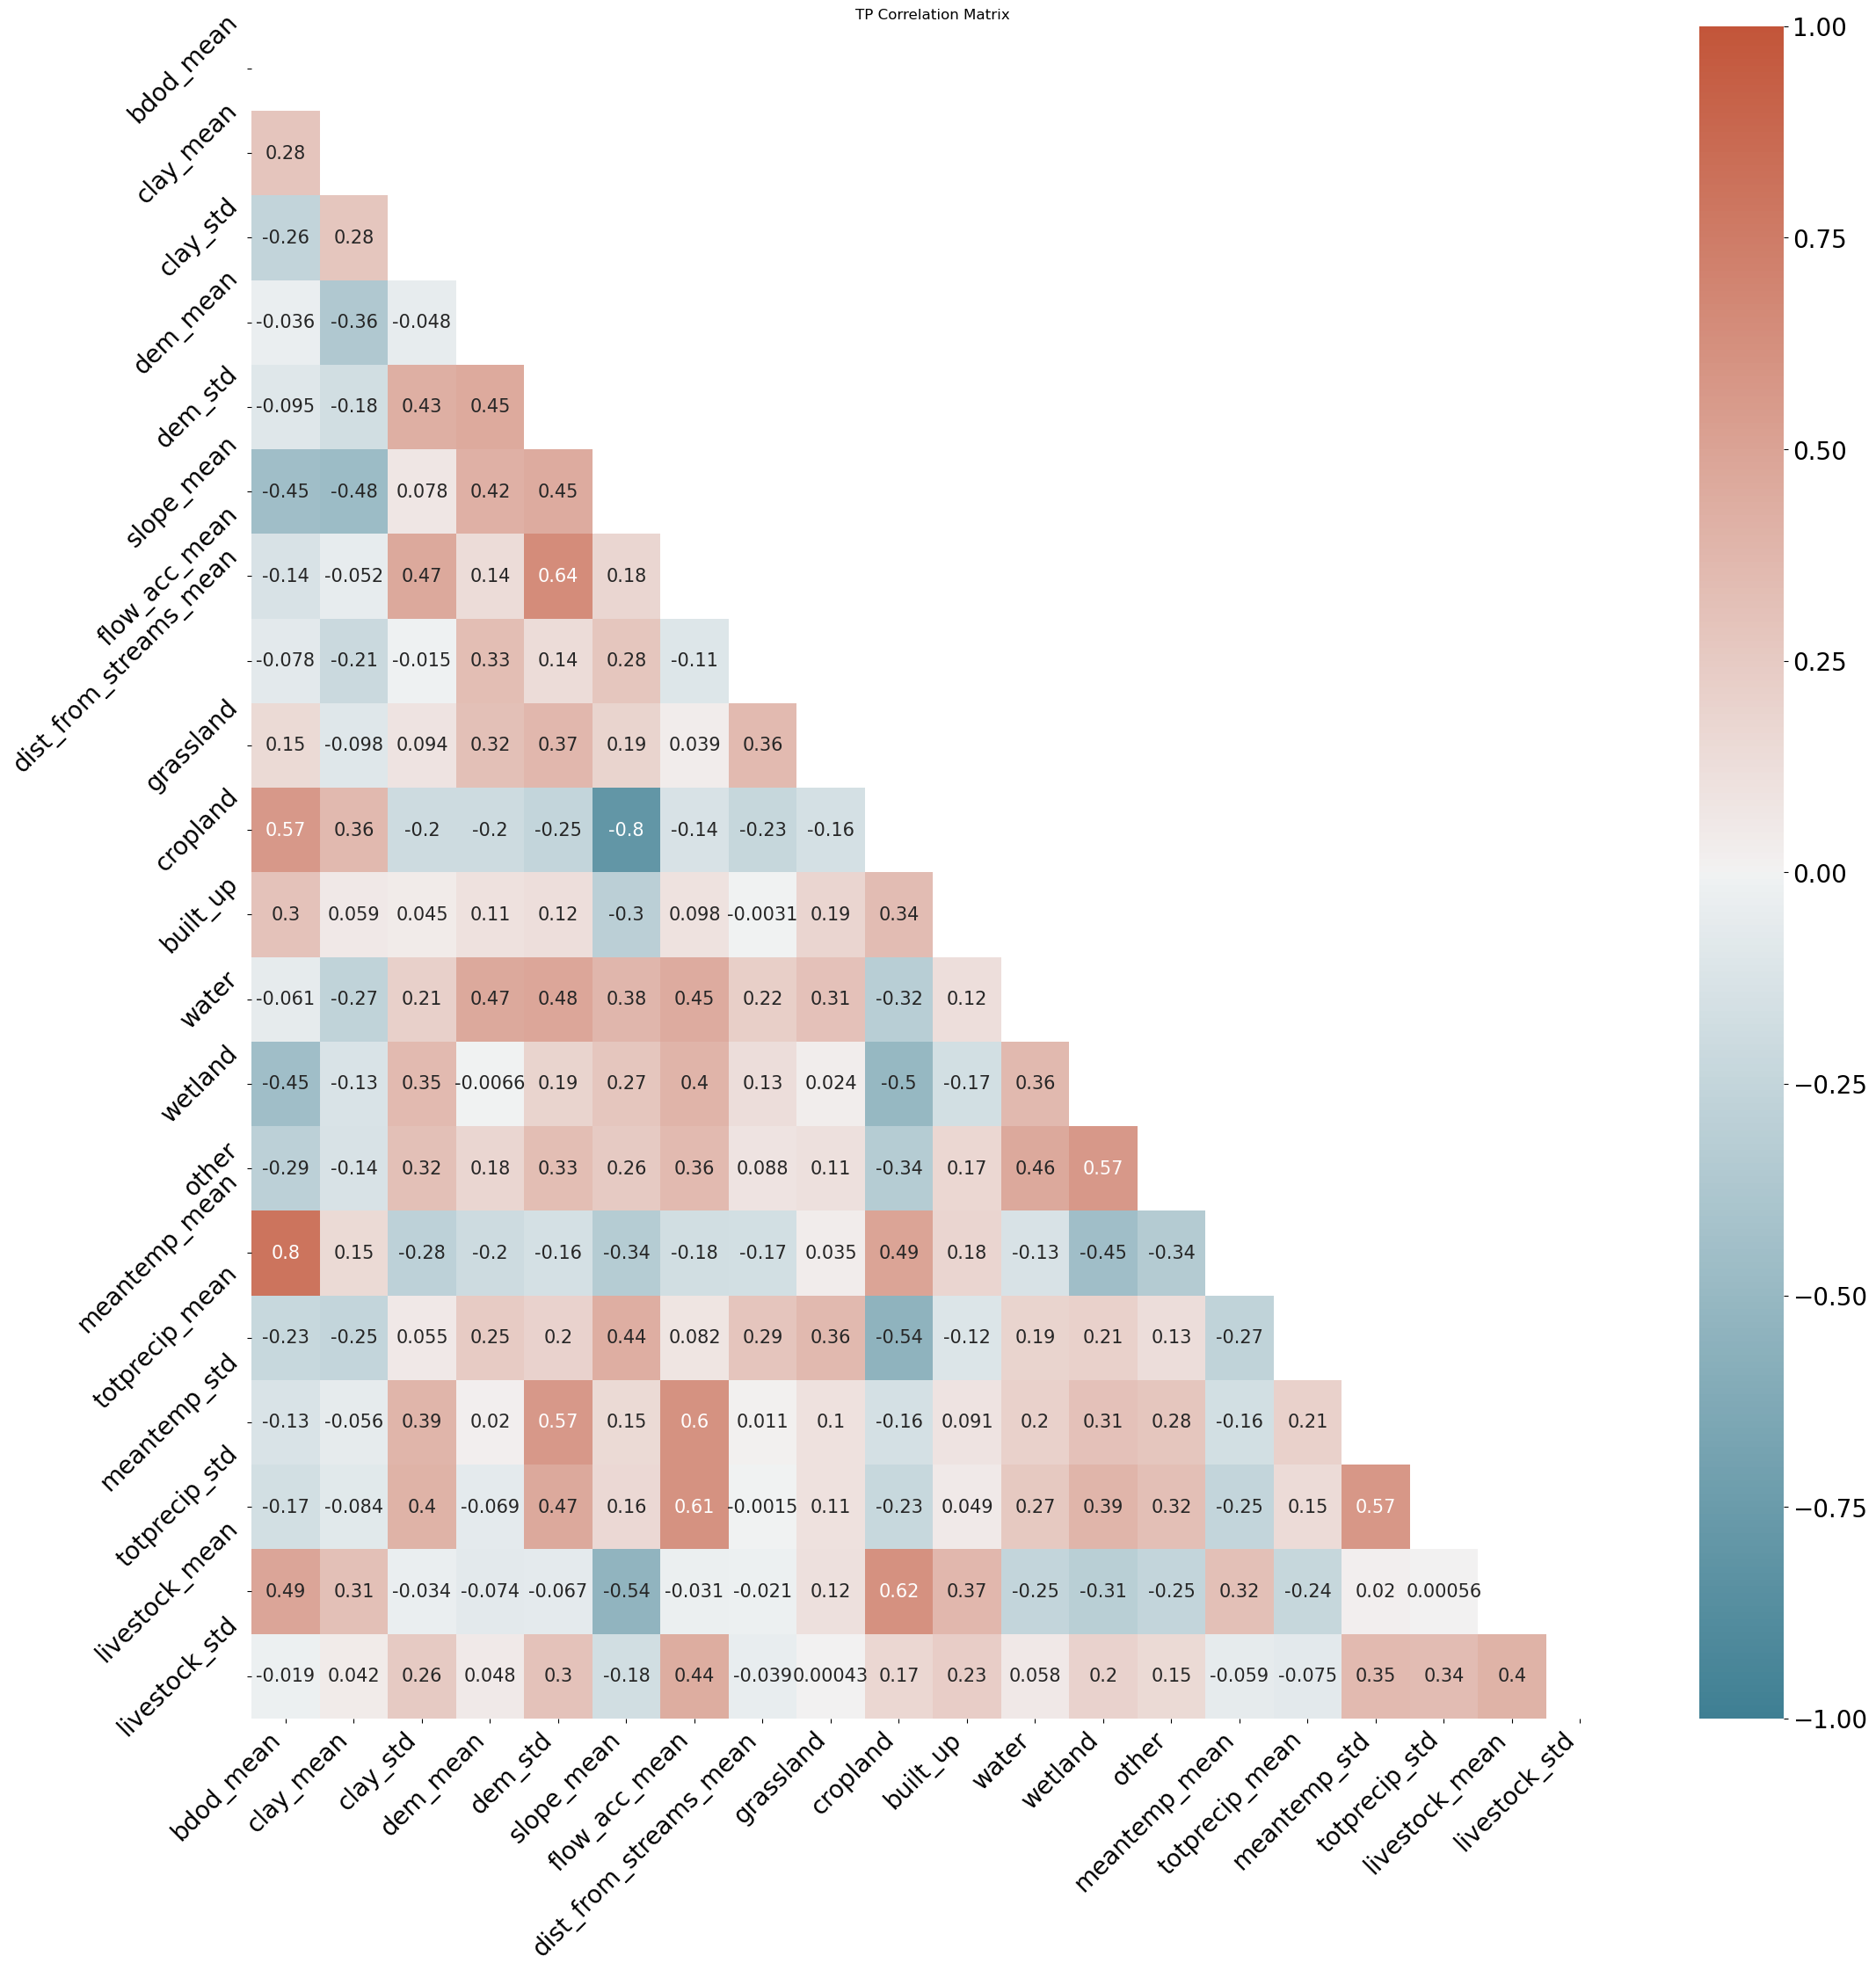

In [31]:
corr = covariates_tn.drop(['site_id'], axis =1).corr(method='spearman')

mask = np.triu(np.ones(corr.shape)).astype(bool)

filtered = corr.where(mask)


plt.figure(figsize=(25, 25))
ax = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, annot_kws={"size": 15})
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=20, rotation =45, ha='right')
plt.title('TP Correlation Matrix')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20) 
plt.show()

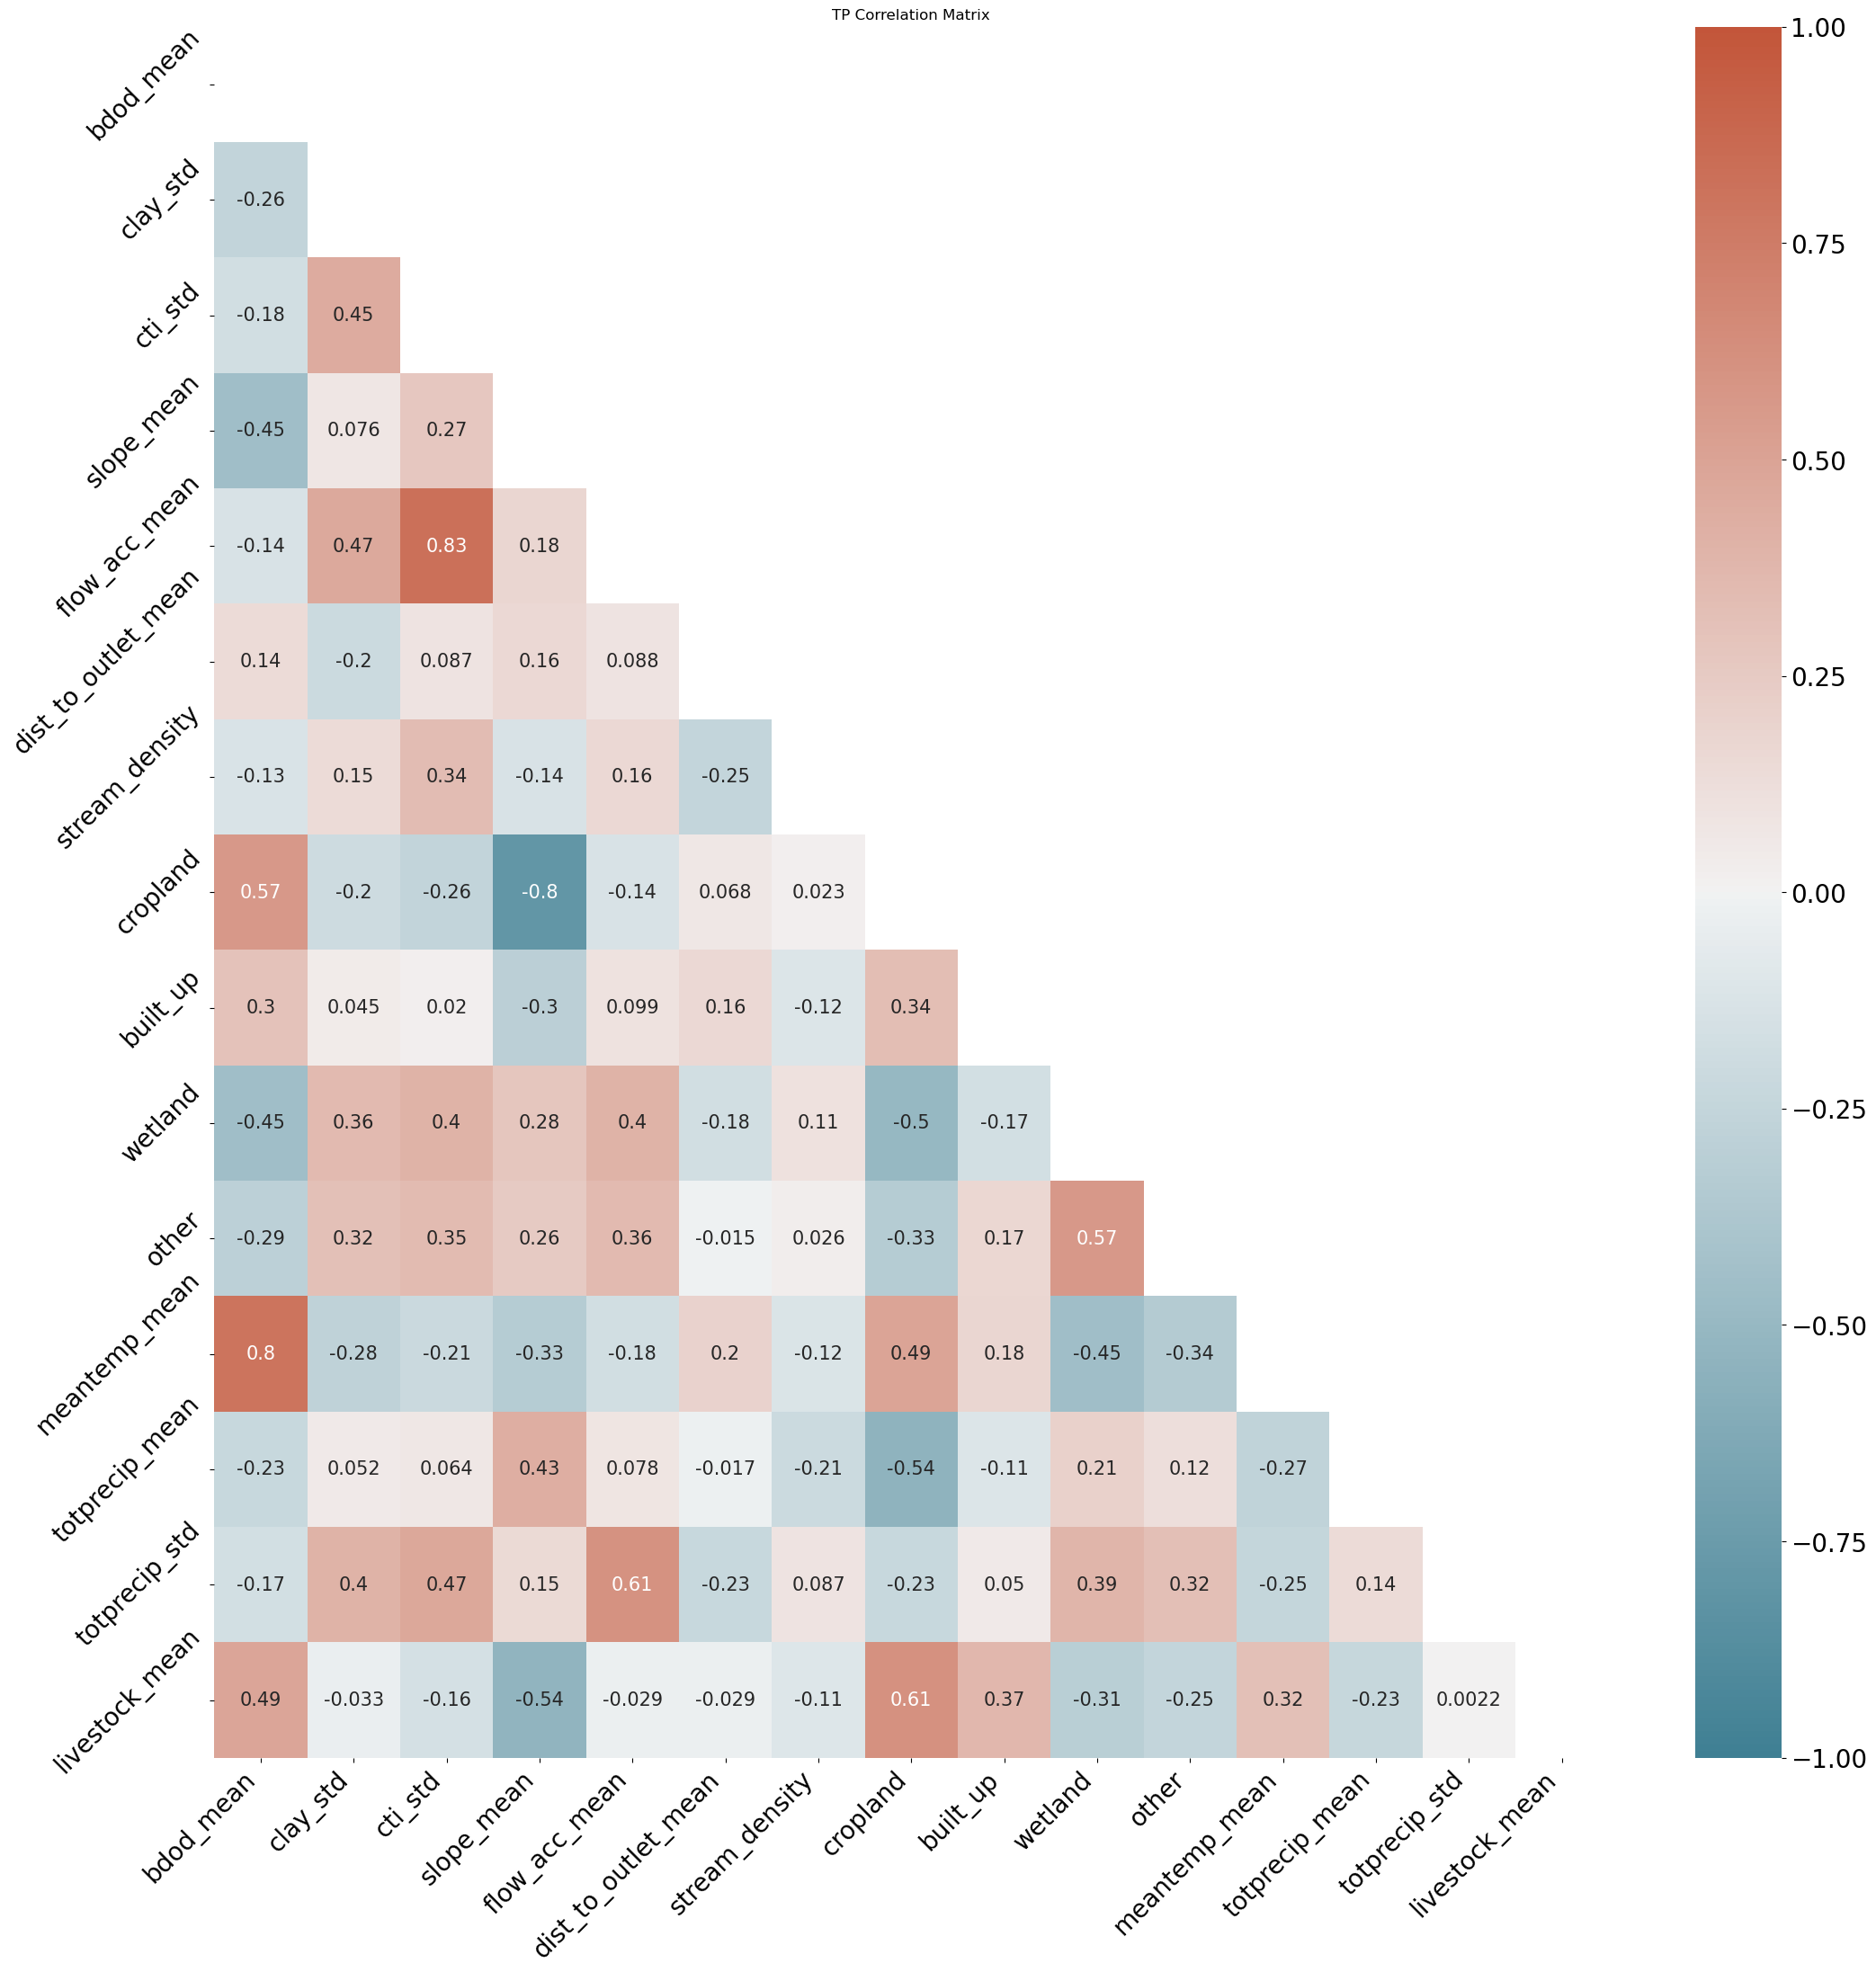

In [32]:
corr = covariates_tp.drop(['site_id'], axis =1).corr(method='spearman')
mask = np.triu(np.ones(corr.shape)).astype(bool)

filtered = corr.where(mask)

plt.figure(figsize=(25, 25))
ax = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, annot_kws={"size": 15})
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=20, rotation =45, ha='right')
plt.title('TP Correlation Matrix')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20) 
plt.show()

In [33]:
covariates_tn.to_csv(f'{input_folder}\\covariates_tn.csv', index = False)

covariates_tp.to_csv(f'{input_folder}\\covariates_tp.csv', index=False)

In [34]:
covariates_tn

,site_id,bdod_mean,clay_mean,clay_std,dem_mean,dem_std,slope_mean,flow_acc_mean,dist_from_streams_mean,grassland,...,built_up,water,wetland,other,meantemp_mean,totprecip_mean,meantemp_std,totprecip_std,livestock_mean,livestock_std
0,ee_SJA0088000,0.65,16.15,4.94,39.36,18.11,3.83,1.92,322.53,11.58,...,0.11,0.42,6.58,0.5,7.2,789.0,0.1,13.0,3.13,1.60
1,ee_SJA0106000,0.64,14.51,1.15,61.33,6.78,3.14,0.34,356.11,17.33,...,0.19,0.16,0.16,0.1,6.8,713.0,0.1,3.0,17.81,1.49
2,ee_SJA0112000,0.65,13.10,1.51,92.82,15.55,3.90,0.55,370.43,20.50,...,0.13,0.31,0.18,0.4,6.8,759.0,0.0,3.0,7.02,1.45
3,ee_SJA0135000,0.63,14.98,1.75,90.99,15.26,3.12,2.19,352.85,10.99,...,0.18,0.10,5.11,0.7,6.5,760.0,0.1,8.0,15.08,7.87
4,ee_SJA0148000,0.64,16.08,4.46,56.89,23.92,3.82,6.09,337.64,13.94,...,0.34,0.30,4.89,0.8,6.9,766.0,0.2,20.0,8.21,6.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,lt_666,0.99,16.73,0.85,20.11,9.92,3.14,0.47,356.89,21.70,...,0.56,0.67,0.11,0.6,9.0,782.0,0.1,16.0,9.60,0.54
890,lt_667,0.90,12.67,1.37,121.38,13.19,4.03,0.58,369.15,20.23,...,0.40,0.07,0.16,0.3,8.3,761.0,0.0,2.0,9.90,2.24
891,lt_668,0.93,15.52,1.08,66.35,11.28,2.53,0.43,316.63,17.06,...,0.53,0.09,0.01,0.2,8.8,710.0,0.1,2.0,17.13,1.52
892,lt_669,0.85,9.48,1.00,151.39,13.76,4.55,0.67,314.93,12.28,...,0.43,3.66,1.01,0.2,8.2,768.0,0.0,1.0,5.52,1.58


In [35]:
covariates_tp

,site_id,bdod_mean,clay_std,cti_std,slope_mean,flow_acc_mean,dist_to_outlet_mean,stream_density,cropland,built_up,wetland,other,meantemp_mean,totprecip_mean,totprecip_std,livestock_mean
0,ee_SJA0088000,0.65,4.94,2.05,3.83,1.92,53493.42,1.01,6.81,0.11,6.58,0.5,7.2,789.0,13.0,3.13
1,ee_SJA0106000,0.64,1.15,1.88,3.14,0.34,326374.61,1.12,35.75,0.19,0.16,0.1,6.8,713.0,3.0,17.81
2,ee_SJA0112000,0.65,1.51,1.90,3.90,0.55,135077.07,0.87,28.81,0.13,0.18,0.4,6.8,759.0,3.0,7.02
3,ee_SJA0135000,0.63,1.75,2.07,3.12,2.19,83673.12,0.98,26.62,0.18,5.11,0.7,6.5,760.0,8.0,15.08
4,ee_SJA0148000,0.64,4.46,2.08,3.82,6.09,96747.86,1.00,17.40,0.34,4.89,0.8,6.9,766.0,20.0,8.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,lt_666,0.99,0.85,1.93,3.14,0.47,22270.12,0.91,36.37,0.56,0.11,0.6,9.0,782.0,16.0,9.60
890,lt_667,0.90,1.37,1.89,4.03,0.58,391902.46,0.88,31.53,0.40,0.16,0.3,8.3,761.0,2.0,9.90
891,lt_668,0.93,1.08,1.88,2.53,0.43,325102.61,0.99,61.12,0.53,0.01,0.2,8.8,710.0,2.0,17.13
892,lt_669,0.85,1.00,1.98,4.55,0.67,623620.75,1.00,3.17,0.43,1.01,0.2,8.2,768.0,1.0,5.52
